### KL divergence

KL散度是建立在Entropy上，Entropy是只考慮一個機率分佈，而KL divergence就是拓展至兩個機率分佈的Entropy，因此又被稱為Relative Entropy，我們來看看他的公式推導，假設今天有未知機率分佈p，我們打算用機率分佈q來算兩者的KL divergence。


<img src="pics/KL divergence.png" alt="KL divergence" style="width: 600px">

KL divergence要表達的是，如果我們知道真實的機率分佈，可以給出最有效的預測結果。但我們通常不會知道，那麼我們一定會有損失，KL divergence就可以用來衡量兩個分佈之間的差異。

這麼講很抽象，我們來舉個例子，是關於太空蠕蟲的例子，這是一位悉尼大學博士生 Thushan Ganegedara 開始撰寫一個系列部落格文章，因為具體好懂，所以在網路上非常多人轉載。

<img src="pics/space worms.webp" alt="space worms" style="width: 400px">


假設我們是太空科學家並在參觀一個遙遠的新星球,我們發現了一些蠕蟲,我們想要研究他們.我們發現這些蠕蟲都有10個牙齒,但是由於某些原因牙齒會進行脫落,從而導致每個蠕蟲最後的牙齒個數各不相同，而我們要搜集這些蠕蟲的牙齒資訊。

由於蠕蟲數量眾多，回傳每一隻的牙齒數量並不實際，另外從太空向地球傳送資訊的成本很高，所以我們要用盡量少的資料表達這些資訊。
此時，比較好的辦法就是搜集足夠的資料並回傳蠕蟲牙齒的機率分佈。

這個分佈圖的做法就是，用X軸表示觀察到的牙齒數量(0,1,2,...)，Y軸表示看到蠕蟲們有X顆牙齒的機率(X顆牙齒蠕蟲數量/總蠕蟲數量)，這樣這張表就完成了。

至此，看以來已經很高效了，但我們還能進一步壓縮資料，怎麼做？就是用一種已知的機率分佈來表示這個分佈(例如均勻分佈，常態分佈...)，舉個例子，如果今天牙齒分佈是均勻分佈，那我們只要回傳兩筆資料，就是**均勻分佈**和**蠕蟲數量**，重點是我們怎麼知道哪種分佈才能更好的解釋真實的分佈情況呢，那就是KL散度派上用場的地方。

**我們進行如下假設：假設有 100 只蠕蟲，各種牙齒數的蠕蟲的數量統計結果如下**

0 顆牙齒：2（機率：p<sub>0</sub> = 0.02）

1 顆牙齒：3（機率：p<sub>1</sub>  = 0.03）

2 顆牙齒：5（機率：p<sub>2</sub>  = 0.05）

3 顆牙齒：14（機率：p<sub>3</sub>  = 0.14)

4 顆牙齒：16（機率：p<sub>4</sub>  = 0.16）

5 顆牙齒：15（機率：p<sub>5</sub>  = 0.15）

6 顆牙齒：12（機率：p<sub>6</sub>  = 0.12）

7 顆牙齒：8（機率：p<sub>7</sub>  = 0.08）

8 顆牙齒：10（機率：p<sub>8</sub>  = 0.1）

9 顆牙齒：8（機率：p<sub>9</sub>  = 0.08）

10 顆牙齒：7（機率：p<sub>10</sub>  = 0.07）

快速做一次完整性檢查！確保蠕蟲總數為 100，且機率總和為 1.0.

蠕蟲總數 = 2+3+5+14+16+15+12+8+10+8+7 = 100

機率總和 = 0.02+0.03+0.05+0.14+0.16+0.15+0.12+0.08+0.1+0.08+0.07 = 1.0

視覺化結果為：

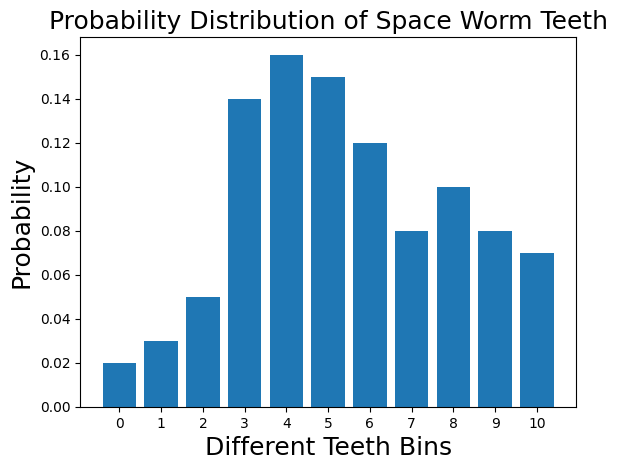

In [2]:
import matplotlib.pyplot as pylab
import numpy as np
from scipy.special import factorial

true_data = [0.02, 0.03, 0.05, 0.14, 0.16, 0.15, 0.12, 0.08, 0.1, 0.08, 0.07]
assert sum(true_data)==1.0

pylab.bar(np.arange(len(true_data)),true_data)
pylab.xlabel('Different Teeth Bins',fontsize=18)
pylab.title('Probability Distribution of Space Worm Teeth',fontsize=18)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(true_data)))
pylab.show()

**嘗試 1：使用均勻分佈建模**

我們首先使用均勻分佈來建模該分佈。均勻分佈只有一個引數：均勻機率；即給定事件發生的機率。

均勻分佈和我們的真實分佈對比：

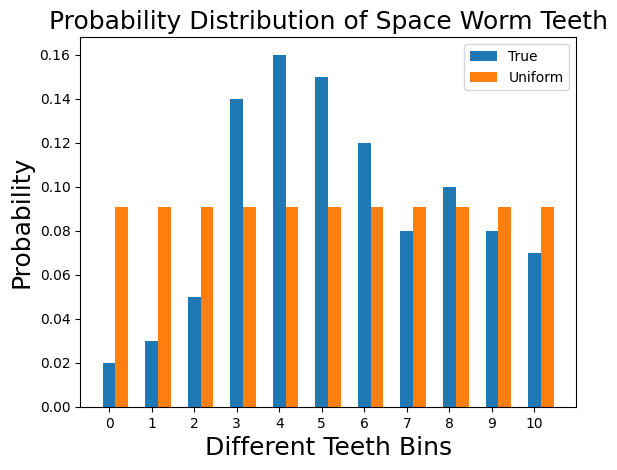

In [3]:
def get_unif_probability(n):
    return 1.0/n

unif_data = [get_unif_probability(11) for _ in range(11)]
width=0.3

pylab.bar(np.arange(len(true_data)),true_data,width=width,label='True')
pylab.bar(np.arange(len(true_data))+ width,unif_data,width=width,label='Uniform')
pylab.xlabel('Different Teeth Bins',fontsize=18)
pylab.title('Probability Distribution of Space Worm Teeth',fontsize=18)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(true_data)))
pylab.legend()
pylab.show()

**嘗試 2：使用二項分佈建模**

二項分佈的公式再複習一下：

<img src="pics/binEquation2.png" alt="binEquation2" style="width: 400px">

再來理解一下二項分佈的均值和標準差

**均值= np**

**標準差= np(1-p)**

均值是什麼意思？均值是指你進行 n 次嘗試時的期望（平均）成功次數。如果每次嘗試成功的機率為 p，那麼可以說 n 次嘗試的成功次數為 np。

標準差又是什麼意思？它表示真實的成功嘗試次數偏離均值的程度。

為了理解標準差，讓我們假設 n=1，那麼等式就成了「標準差= p(1-p)」。那麼當 p=0.5 時（正面和背面向上的機率一樣），標準差最大；當 p=1 或 p=0 時（只能得到正面或背面中的一種），標準差最小。

現在我們已經理解了二項分佈，接下來回到我們之前的問題。首先讓我們計算蠕蟲的牙齒的期望數量：

有了均值，我們可以計算 p 的值：

均值 = np

5.44 = 10p

p = 0.544


首先讓我們計算蠕蟲的牙齒的期望數量：

<img src="pics/space warm teeth expectation.jpeg" alt="space warm teeth expectation" style="width: 700px">

注意，這裡的 n 是指在蠕蟲中觀察到的最大牙齒數。
你可能會問我們為什麼不把蠕蟲總數（即 100）或總事件數（即 11）設為 n。

我們很快就將看到原因。有了這些資料，我們可以按如下方式定義任意牙齒數的機率。

鑑於牙齒數的取值最大為 10，那麼看見 k 顆牙齒的概率是多少（這裡看見一顆牙齒即為一次成功嘗試）？

從拋硬幣的角度看，這就類似於：

假設我拋 10 次硬幣，觀察到 k 次正面向上的概率是多少？

從形式上講，我們可以計算所有不同 k 值的機率。

其中 k 是我們希望觀察到的牙齒數量，是第 k 個牙齒數量位置（即 0 顆牙齒、1 顆牙齒……）的二項機率。

所以，計算結果如下：

<img src="pics/space warm bino.jpeg" alt="space warm bino" style="width: 400px">

Success probability:  0.5439999999999999


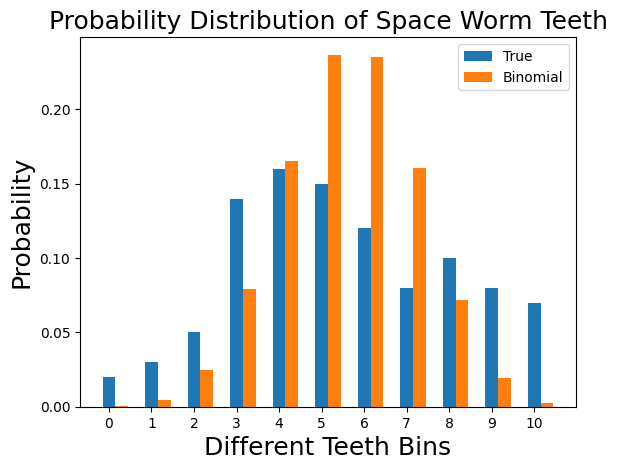

In [5]:
def get_bino_probability(exp, k, n):
    return (factorial(n)/(factorial(k)*factorial(n-k)))*(exp**k)*((1.0-exp)**(n-k))

# probiblity
def get_bino_success(true_data, n):
    return np.sum(np.array(true_data)*np.arange(len(true_data)))/n

n_trials = 10
succ = get_bino_success(true_data, n_trials)
print('Success probability: ', succ)

bino_data = [get_bino_probability(succ, k, n_trials) for k in range(11)]
# print(bino_data)
width=0.3

pylab.bar(np.arange(len(true_data)), true_data, width=width, label='True')
pylab.bar(np.arange(len(true_data)) + width, bino_data, width=width, label='Binomial')
pylab.xlabel('Different Teeth Bins',fontsize=18)
pylab.title('Probability Distribution of Space Worm Teeth',fontsize=18)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(true_data)))
pylab.legend()
pylab.show()

這邊可以先做個小結

現在回頭看看我們已經完成的工作。首先，我們理解了我們想要解決的問題。我們的問題是將特定類型的太空蠕蟲的牙齒數據統計用儘量小的資料量發回地球。為此，我們想到用某個已知分布來表示真實的蠕蟲統計數據，這樣我們就可以只發送該分布的參數，而無需發送真實統計數據。我們檢查了兩種類型的分布，得到了以下結果。

均勻分布——機率為 0.0909

二項分布——n=10、p=0.544，k 取值在 0 到 10 之間。

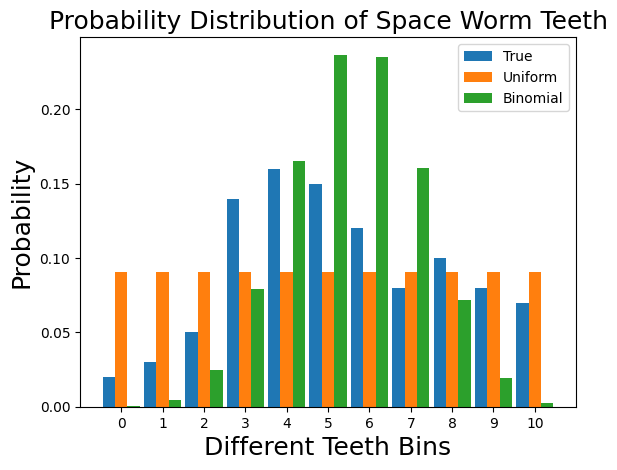

In [6]:
pylab.bar(np.arange(len(true_data))-width,true_data,width=width,label='True')
pylab.bar(np.arange(len(true_data)),unif_data,width=width,label='Uniform')
pylab.bar(np.arange(len(true_data))+width,bino_data,width=width,label='Binomial')
pylab.xlabel('Different Teeth Bins',fontsize=18)
pylab.title('Probability Distribution of Space Worm Teeth',fontsize=18)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(true_data)))
pylab.legend()
pylab.show()

**我們如何定量地確定哪個分布更好？**

經過這些計算之後，我們需要一種衡量每個近似分布與真實分布之間匹配程度的方法。這很重要，這樣當我們發送信息時，我們才無需擔憂「我是否選擇對了？」畢竟太空蠕蟲關乎我們每個人的生命。

這就是 KL 散度的用武之地。我們再看一次KL散度的公式：


<img src="pics/KL divergence.png" alt="KL divergence" style="width: 600px">


q(x) 是近似分布，p(x) 是我們想要用 q(x) 匹配的真實分布。直觀地說，這衡量的是給定任意分布偏離真實分布的程度。如果兩個分布完全匹配，KL散度為0
，否則它的取值應該是在 0 到無窮大（inf）之間。KL 散度越小，真實分布與近似分布之間的匹配就越好。

In [13]:
# python implement
def get_klpq_div(p_probs, q_probs):
    kl_div = 0.0
    
    for pi, qi in zip(p_probs, q_probs):
        kl_div += pi*np.log(pi/qi)
    
    return kl_div

我們計算一下上面兩個近似分布與真實分布之間的 KL 散度。

In [14]:
print('KL(True||Uniform): ',get_klpq_div(true_data, unif_data))
print('KL(True||Binomial): ',get_klpq_div(true_data, bino_data))

KL(True||Uniform):  0.13667971094966938
KL(True||Binomial):  0.42734972485619327


這裡要注意，KL散度不具對稱性，也就是用p去近似q和用q去近似p的結果會是不一樣的

In [15]:
def get_klqp_div(p_probs, q_probs):
    kl_div = 0.0
    
    for pi, qi in zip(p_probs, q_probs):
        kl_div += qi*np.log(qi/pi)
    
    return kl_div

print('KL(True||Uniform): ',get_klqp_div(true_data,unif_data))
print('KL(True||Binomial): ',get_klqp_div(true_data,bino_data))

KL(True||Uniform):  0.16971322138822667
KL(True||Binomial):  0.2519548471987832


**結論**

現在我們有些可靠的結果了。儘管均勻分布看起來很簡單且信息不多而二項分布帶有更有差別的信息，但實際上均勻分布與真實分布之間的匹配程度比二項分布的匹配程度更高。說老實話，這個結果實際上讓我有點驚訝。因為我之前預計二項分布能更好地建模這個真實分布。因此，這個實驗也能告訴我們：不要只相信自己的直覺！